In [ ]:
# PART 1 Creating KPIs
# !!SLIDESCOPE>> Institute

# PART 2 Creating Visuals (Pie Charts)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/HR_Analytics.csv")

In [5]:
df.head(3)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0


In [6]:
num_of_employees = df.shape[0]

In [ ]:
num_of_employees

1480

In [7]:
attrition_count = df[df['Attrition']=="Yes"].shape[0]

In [8]:
attrition_count

238

In [9]:
attrition_rate = (attrition_count/num_of_employees)*100

In [10]:
attrition_rate

16.08108108108108

In [11]:
avg_age = float(df['Age'].mean())

In [12]:
# avg_age

#round avg_age to 2 decimal places

avg_age = round(avg_age,2)
avg_age

36.92

In [13]:
# average salary

avg_salary = round(float(df['MonthlyIncome'].mean()),2)
avg_salary

6504.99

In [14]:
# average tenue

avg_tenure = round(float(df['YearsAtCompany'].mean()),2)
avg_tenure

7.01

In [15]:
# num_of_employees , attrition_count , attrition_rate , avg_age , avg_salary , avg_tenure use these variables as a table

kpis = {
    "Number of Employees" : [num_of_employees],
    "Attrition Count" : [attrition_count],
    "Attrition Rate" : [attrition_rate],
    "Average Age" : [avg_age],
    "Average Salary" : [avg_salary],
    "Average Tenure" : [avg_tenure]
}

Kpidf = pd.DataFrame(kpis)

In [16]:
Kpidf

,Number of Employees,Attrition Count,Attrition Rate,Average Age,Average Salary,Average Tenure
0,1480,238,16.081081,36.92,6504.99,7.01


**PART 2 Starts Here **

In [17]:
df.set_index("EducationField")["Attrition"].value_counts()

,count
Attrition,
No,1242
Yes,238


In [18]:
df.groupby(['EducationField', 'Attrition'])['Attrition'].count().reset_index(name='Count')

,EducationField,Attrition,Count
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,518
3,Life Sciences,Yes,89
4,Marketing,No,125
5,Marketing,Yes,36
6,Medical,No,407
7,Medical,Yes,63
8,Other,No,72
9,Other,Yes,11


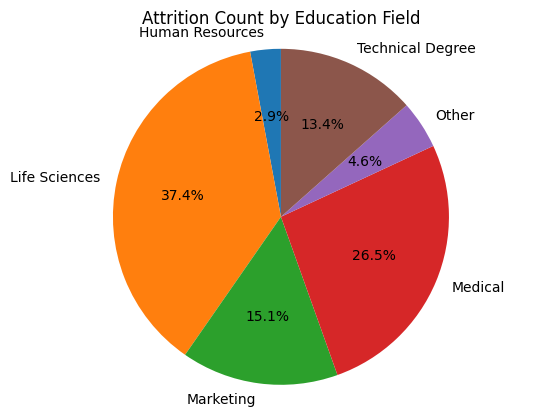

In [19]:
# Assuming 'df' is your DataFrame containing 'EducationField' and 'Attrition' columns

# Group data by EducationField and Attrition to get counts
attrition_by_education = df.groupby(['EducationField', 'Attrition'])['Attrition'].count().reset_index(name='Count')

# Create a list of EducationFields
education_fields = attrition_by_education['EducationField'].unique()

# Create a list to store attrition counts for each EducationField
attrition_counts = []

# Iterate through EducationFields and calculate attrition counts for 'Yes'
for field in education_fields:
    attrition_count = attrition_by_education[(attrition_by_education['EducationField'] == field) & (attrition_by_education['Attrition'] == 'Yes')]['Count'].values[0]
    attrition_counts.append(attrition_count)



# Create the pie chart using matplotlib
plt.pie(attrition_counts, labels=education_fields, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Count by Education Field')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [20]:
attrition_by_education['EducationField'].unique()

array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

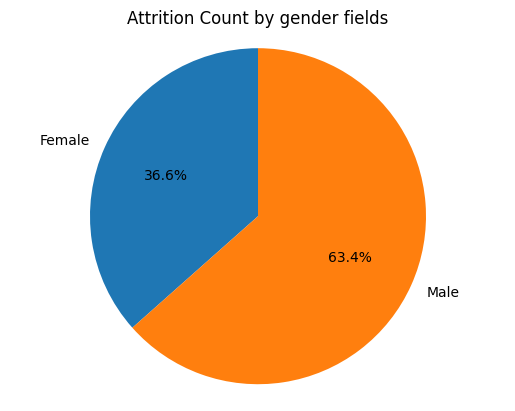

In [21]:
# Assuming 'df' is your DataFrame containing 'EducationField' and 'Attrition' columns

# Group data by EducationField and Attrition to get counts
attrition_by_gender = df.groupby(['Gender', 'Attrition'])['Attrition'].count().reset_index(name='Count')

# Create a list of EducationFields
gender_fields = attrition_by_gender['Gender'].unique()

# Create a list to store attrition counts for each EducationField
attrition_counts = []

# Iterate through EducationFields and calculate attrition counts for 'Yes'
for field in gender_fields:
    attrition_count = attrition_by_gender[(attrition_by_gender['Gender'] == field) & (attrition_by_gender['Attrition'] == 'Yes')]['Count'].values[0]
    attrition_counts.append(attrition_count)



# Create the pie chart using matplotlib
plt.pie(attrition_counts, labels=gender_fields, autopct='%1.1f%%', startangle=90)
plt.title('Attrition Count by gender fields')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [22]:
attrition_by_gender = df.groupby(['Gender', 'Attrition'])['Attrition'].count().reset_index(name='Count')
attrition_by_gender

,Gender,Attrition,Count
0,Female,No,504
1,Female,Yes,87
2,Male,No,738
3,Male,Yes,151


In [23]:
gender_fields = attrition_by_gender['Gender'].unique()
gender_fields

array(['Female', 'Male'], dtype=object)

In [24]:
attrition_counts = []